In [17]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Function: Download mesh mask variables

In [2]:
def get_variables_planes(dirname, filename):
    with nc.Dataset(os.path.join(dirname, filename), 'r') as nbl:
        x, y =  slice(1,-1,None), slice(1,-1,None)
        gdepw = nbl.variables['gdepw_1d'][0, :]
        tmask = nbl.variables['tmask'][0, :, y, x]
        mbathy = nbl.variables['mbathy'][0, y, x]
        e1t = nbl.variables['e1t'][0, y, x]
        e2t = nbl.variables['e2t'][0, y, x]  
        return gdepw, tmask, mbathy, e1t, e2t

In [3]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepw0, tmask0, mbathy0, e1t0, e2t0 = get_variables_planes(dirname, filename)

In [4]:
mbathy.shape, e1t.shape, e2t.shape, tmask.shape

((272, 242), (272, 242), (272, 242), (80, 272, 242))

In [5]:
mbathy_diff = mbathy - mbathy0
xs = np.arange(mbathy_diff.shape[-1])
ys = np.arange(mbathy_diff.shape[-2])

In [6]:
axis_thalweg = np.zeros(mbathy_diff.shape[-2])
for y in range(len(axis_thalweg)):
    mbathy_row = mbathy_diff[y, :]
    max_mbathy_row = mbathy_row.max()
    x_inds_max_mbathy_row = np.where(mbathy_row == max_mbathy_row)[0]
    x_ind_thalweg = int(np.median(x_inds_max_mbathy_row))
    axis_thalweg[y] = x_ind_thalweg

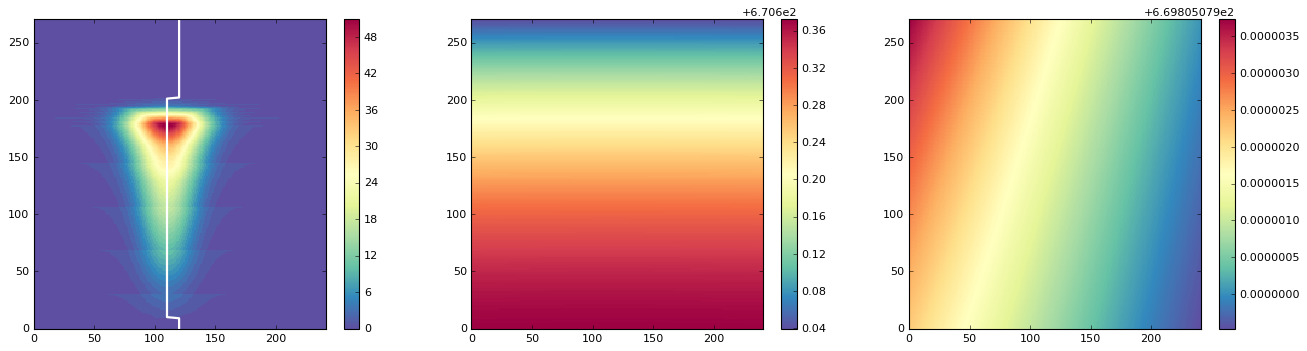

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
p1 = ax1.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r)
p2 = ax2.pcolormesh(xs, ys, e1t, cmap=cm.Spectral_r)
p3 = ax3.pcolormesh(xs, ys, e2t, cmap=cm.Spectral_r)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])
fig.colorbar(p1, ax=ax1); fig.colorbar(p2, ax=ax2); fig.colorbar(p3, ax=ax3)

ax1.plot(axis_thalweg, ys, c='w', linewidth=2)

In [44]:
bottom_mask = np.zeros_like(tmask0)
for i in range(tmask0.shape[-1]):
    for j in range(tmask0.shape[-2]):
        k = mbathy0[j, i]
        bottom_mask[k, j, i] = 1
        
bottom_mask.shape, mbathy0.shape

((80, 272, 242), (272, 242))

<a list of 197 text.Text objects>

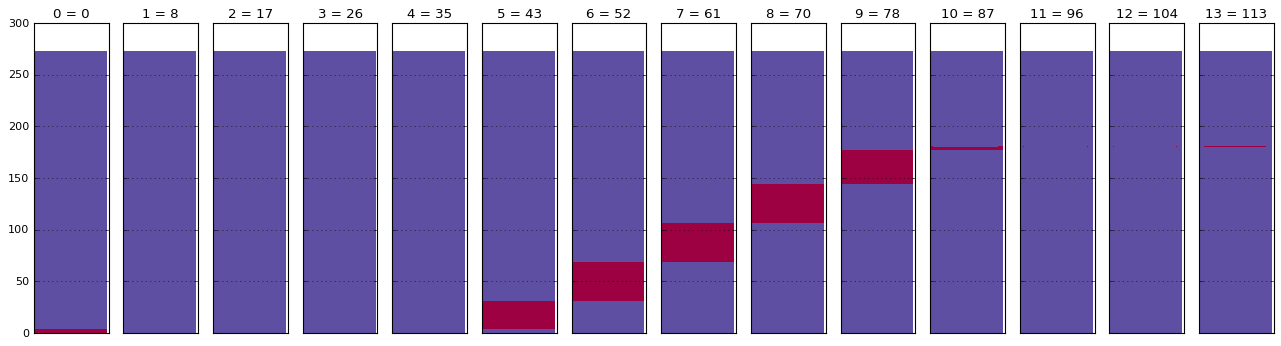

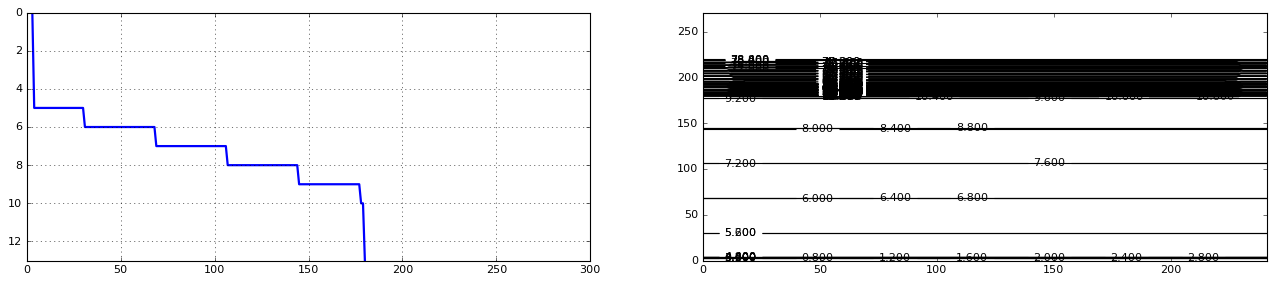

In [85]:
N = 14
deps = np.arange(0, 0+N)
fig, ax = plt.subplots(1, N, figsize=(20, 5), sharey=True)
for n, dep in zip(np.arange(N), deps):
    ax[n].pcolormesh(bottom_mask[dep, :, :], cmap=cm.Spectral_r)
    ax[n].xaxis.set_visible(False)
    ax[n].set_title(str(dep) + ' = ' + str(int(gdepw0[dep])))
    ax[n].grid()
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.plot(mbathy0[:, int(0.5*mbathy0.shape[-1])], linewidth=2)
ax1.set_ylim([deps[-1], deps[0]])
ax1.grid()
c = ax2.contour(xs, ys, mbathy0, 200, colors='k')
ax2.clabel(c, inline=1, fontsize=10)

<a list of 197 text.Text objects>

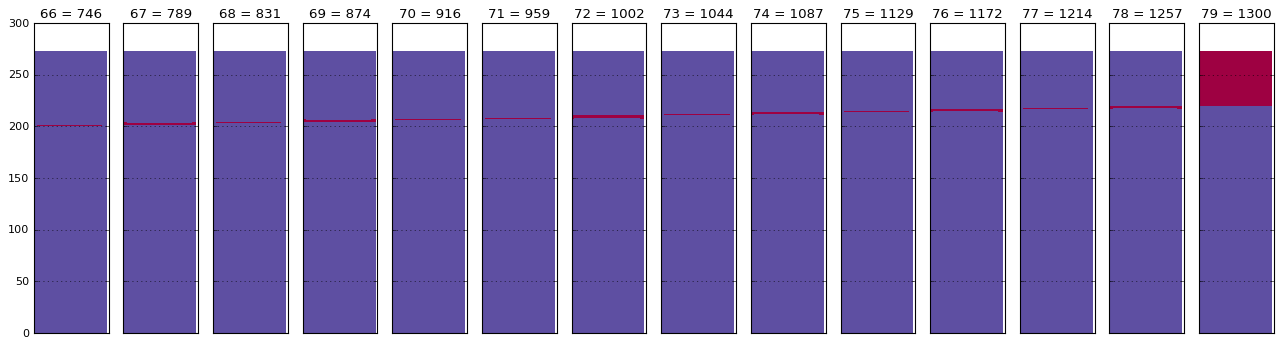

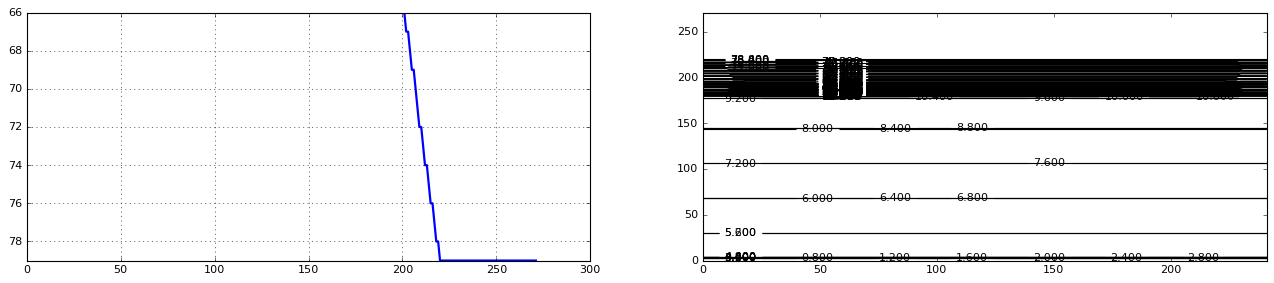

In [86]:
N = 14
deps = np.arange(66, 66+N)
fig, ax = plt.subplots(1, N, figsize=(20, 5), sharey=True)
for n, dep in zip(np.arange(N), deps):
    ax[n].pcolormesh(bottom_mask[dep, :, :], cmap=cm.Spectral_r)
    ax[n].xaxis.set_visible(False)
    ax[n].set_title(str(dep) + ' = ' + str(int(gdepw0[dep])))
    ax[n].grid()
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
ax1.plot(mbathy0[:, int(0.5*mbathy0.shape[-1])], linewidth=2)
ax1.set_ylim([deps[-1], deps[0]])
ax1.grid()
c = ax2.contour(xs, ys, mbathy0, 200, colors='k')
ax2.clabel(c, inline=1, fontsize=10)

In [ ]:
x, y =  slice(1,-1,None), int(ind_plane)
with scDataset(files) as ds:
    vomecrty0 = ds.variables['vomecrty'][:, :, y, x]
    vmask0 = vmask[:, y, :]
    vmask = np.tile(vmask0, (vomecrty0.shape[0],1, 1))  
    vomecrty = np.ma.array(vomecrty0, mask=1 - vmask)

In [ ]:
    for i in range(bottom_mask.shape[-1]):
        for j in range(bottom_mask.shape[-2]):
            vovecrtz = ds.variables['vovecrtz'][:, z, j, i]